# Multivariate Linear Regression

### Importing Modules and Opening CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('dataframe_for_model.csv')
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo
...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove


Our dataset as is has 11 columns, 10 numerical and 1 categorical (City). Our aim is to use a combination of the 1 categorical variable and 9 numerical variables to predict "Listed Price."

### Defining X and Y

In [2]:

#X = df.drop(['Listed Price'], axis=1)
#y = df["Listed Price"]

#X

In [3]:
X = df.drop(['Listed Price'], axis=1)
y = df["Listed Price"].values

Since we have a categorical variable, we need to encode this variable into indicator/dummy values that will help us with our analysis.

In [4]:
City = pd.get_dummies(X, drop_first=True)

X = X.drop("City", axis=1)
X = pd.merge(X, City).values

X

array([[1.0000e+00, 3.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 5.0000e+00, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+01, 4.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.7436e+04, 3.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.7437e+04, 3.0000e+00, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.7438e+04, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [5]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## Creating a Linear Model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = lr.predict(X_test) # using linear model to predict y values from test set
print(y_pred)

[ 855656.46291469 2467670.60572817  395960.46702519 ... -487554.65192878
 1281151.12281367 2058122.64477613]


In [8]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6246754167721984
Testing MSE error is: 1017633271059.505


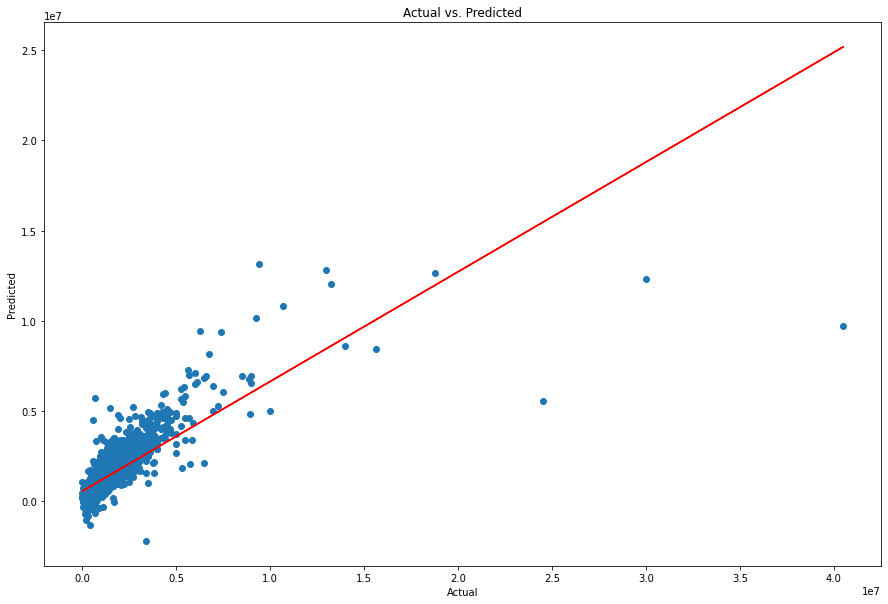

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

The plot above depicts the relationship between our test set and their predicted values. Based on the linear regression line, the general trend of data, and r^2 score of ~63%, we can say that our linear model is decent in predicting the listed prices of California houses. The regression score, which is based on 10 variables, gives us an accuracy of approximately 63%. This score is _not bad_, but the scatter also indicates some variability. We can try to increase this accuracy score with additional regression techniques.

In [10]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred})

pred_y_df[0:10]

,Actual Value,Predicted Value,Difference
0,915000.0,8.556565e+05,59343.537085
1,1938000.0,2.467671e+06,-529670.605728
2,750000.0,3.959605e+05,354039.532975
3,139900.0,-2.816822e+05,421582.196987
4,1899000.0,2.068412e+06,-169412.225038
5,3888000.0,4.635833e+06,-747833.451439
6,1250000.0,8.405955e+05,409404.483362
7,1111000.0,9.822946e+05,128705.400808
8,869500.0,7.557640e+05,113736.038152
9,2348000.0,2.083873e+06,264127.322852


The table above shows us our actual value (`y_test` values) against their predictions based on the model (`y_pred`). We also look at their differences, which seems to vary quite a bit. The difference is large, but this is somewhat expected due to house listing prices being high to begin with.

## Multicollinearity Check

After running a linear model, the next form of action might be to create a multivariate polynomial model. However, before doing so, it is important to look at the variables to test for any interactions/correlations between the predictor variables themselves. If this does exist, this could be a problem, as our statistical inferences will be less reliable. In other words, if there are existing correlations within the predictor variables, we cannot say (without bias) that the target variable is being predicted accurately. Therefore, we can run a multicollinearity check on our numerical variables using the `VIF` library.

In [11]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Unnamed: 0,3.810433
1,Bedrooms,18.765289
2,Bathrooms,18.377433
3,Total interior livable area,20.046072
4,Elementary School Score,14.787356
5,Middle School Score,16.899444
6,High School Score,20.337899
7,Tax assessed value,113.748033
8,Annual tax amount,121.087900
9,Listed Price,5.263111


City is not included in this analysis as it is not a numerical variable.

"We can see here that the many variables have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables."

- Cited by https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

Now, we rerun our multicollinearity check without the categorical variable and our target variable.

In [12]:
X = df.drop(["Listed Price", "City"],axis=1)
calc_vif(X)

,variables,VIF
0,Unnamed: 0,3.744089
1,Bedrooms,18.108398
2,Bathrooms,18.355055
3,Total interior livable area,16.741989
4,Elementary School Score,14.740848
5,Middle School Score,16.893905
6,High School Score,20.292230
7,Tax assessed value,113.341761
8,Annual tax amount,118.544315


Looking at all the variables (excluding categorical), we can see that many variables are highly correlated with each other. This can produce a major problem for our multiple polynomial model, as we may not be able to recognize which variables are responsible for the output variable.

However, we can combine the correlated variables and drop the others to predict "Listed Price" in future models. This not only produces a cleaner dataset, but can also provides us with a more reliable model.

In [13]:
df2 = df.copy()
df2['Bedrooms_Bathrooms'] = df.apply(lambda x: x['Bedrooms'] - x['Bathrooms'],axis=1)

df2['School_Score'] = df.apply(lambda x: (x['Elementary School Score'] + x['Middle School Score'] +
                                                                          x['High School Score'])/3,axis=1)

df2['Tax_value'] = df.apply(lambda x: x['Tax assessed value'] - x['Annual tax amount'],axis=1)

X = df2.drop(['Listed Price','City', 'Bedrooms','Bathrooms', 'Elementary School Score', 'Middle School Score',
             'High School Score', 'Tax assessed value', 'Annual tax amount'],axis=1)
calc_vif(X)

,variables,VIF
0,Unnamed: 0,3.603681
1,Total interior livable area,6.921371
2,Bedrooms_Bathrooms,2.023797
3,School_Score,6.942305
4,Tax_value,2.916035


At this point, we've combined the variables that are correlated with one another. While the VIF score is still not perfect, it is a lot better than before. At this point, we can proceed with our attempts at a multivariate polynomial model.

In [14]:
df2 = df2[['Unnamed: 0', 'Total interior livable area', 'Bedrooms_Bathrooms', 'School_Score', 'Tax_value',"City","Listed Price"]]
df2

,Unnamed: 0,Total interior livable area,Bedrooms_Bathrooms,School_Score,Tax_value,City,Listed Price
0,1,872.0,1.0,2.333333,498747.0,Los Angeles,525000.0
1,3,2612.0,2.0,8.000000,1754213.0,Culver City,1895000.0
2,10,1579.0,2.0,6.000000,70443.0,Santa Clara,1428000.0
3,12,3351.0,3.0,7.333333,2055701.0,San Francisco,2250000.0
4,18,2100.0,1.0,6.666667,1814479.0,San Mateo,2390000.0
...,...,...,...,...,...,...,...
12486,47425,2219.0,1.0,7.666667,888056.0,San Jose,1224888.0
12487,47427,4680.0,-1.0,6.333333,2334867.0,Villa Park,2569000.0
12488,47436,1860.0,1.0,5.666667,570789.0,Los Angeles,2295000.0
12489,47437,2125.0,0.0,7.333333,477069.0,Elk Grove,499888.0


In [15]:
X = df2.drop(['Listed Price'], axis=1)
y = df2["Listed Price"].values

In [16]:
City = pd.get_dummies(X, drop_first=True)

X = X.drop("City", axis=1)
X = pd.merge(X, City).values

X

array([[1.0000e+00, 8.7200e+02, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 2.6120e+03, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+01, 1.5790e+03, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.7436e+04, 1.8600e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.7437e+04, 2.1250e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.7438e+04, 1.1120e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

We can now use this edited dataframe to rerun our linear regression and see how that changes our scores and accuracy.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test) # using linear model to predict y values from test set
#print(y_pred)

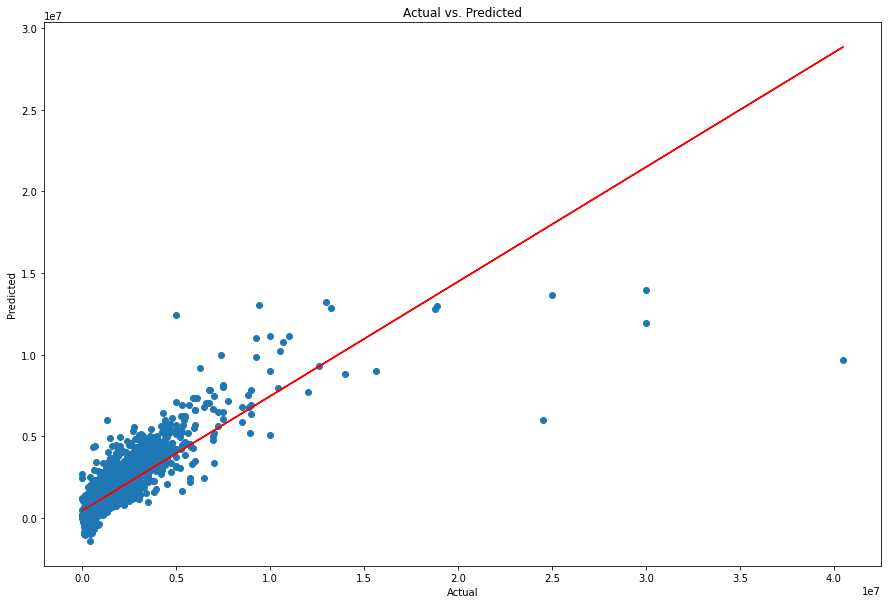

In [20]:
plt.figure(figsize=(15,10))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

m,b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test, m*y_test+b, color='red')

In [21]:
print(r2_score(y_test, y_pred)) # calculating r-score
#print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6792059222458562


In [22]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred})

pred_y_df[0:10]

,Actual Value,Predicted Value,Difference
0,915000.0,9.159267e+05,-926.677650
1,1938000.0,2.507681e+06,-569681.028344
2,750000.0,5.128298e+05,237170.209211
3,139900.0,-3.306918e+05,470591.837158
4,1899000.0,2.272652e+06,-373651.964165
5,3888000.0,4.641832e+06,-753831.915628
6,1250000.0,8.421056e+05,407894.442027
7,1111000.0,8.346178e+05,276382.249750
8,869500.0,6.172298e+05,252270.249973
9,2348000.0,2.242456e+06,105544.152141


With the plot above, we can see that that a linear regression model may not be enough to capture the model's curve. Even with the data adjustments, the R^2 and MSE does not change much. This implies that we need to employ a different model.

## Polynomial Model - need help here

In [23]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(degree=2, include_bias=False)

#X_ = poly.fit_transform(X)
#X_test_ = poly.fit_transform(X_test)

# L1 & L2 Regression (Lasso and Ridge)

As seen in our multicollinearity check above, we can deduce that the features with a high VIF value likely have very high coefficients. This implies that our dependent variable (Listed Price) would be significantly overpowered by those features, which can lead to overfitting. We can employ L1 and L2 Regression to reduce model complexity and avoid overfitting. 

## Simple Ridge and Lasso

In [24]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [25]:
# moving Listed Price variable to the end

df2 = df2[ [ col for col in df2.columns if col != 'Listed Price' ] + ['Listed Price']]

In [26]:
City = pd.get_dummies(df2, drop_first=True)

df2 = pd.merge(df2, City)
df2 = df2.drop("City", axis=1)

df2

,Unnamed: 0,Total interior livable area,Bedrooms_Bathrooms,School_Score,Tax_value,Listed Price,City_Aguanga,City_Alameda,City_Alamo,City_Albany,...,City_Wofford Heights,City_Woodbridge,City_Woodlake,City_Woodland,City_Wrightwood,City_Yolo,City_Yorba Linda,City_Yountville,City_Yuba City,City_Zamora
0,1,872.0,1.0,2.333333,498747.0,525000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2612.0,2.0,8.000000,1754213.0,1895000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,1579.0,2.0,6.000000,70443.0,1428000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,3351.0,3.0,7.333333,2055701.0,2250000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,2100.0,1.0,6.666667,1814479.0,2390000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,2219.0,1.0,7.666667,888056.0,1224888.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12487,47427,4680.0,-1.0,6.333333,2334867.0,2569000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12488,47436,1860.0,1.0,5.666667,570789.0,2295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489,47437,2125.0,0.0,7.333333,477069.0,499888.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X = df2.drop("Listed Price", axis=1)
y = df2["Listed Price"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)

In [29]:
reg = LinearRegression().fit(X_train, y_train)

In [30]:
reg.score(X_test, y_test)

0.6500199709113901

Looking at the score of the test set, we can see that it isn't too low. For data that the model has never seen before, it is fitting the data with ~65% accuracy. We can test this with the training data to see if there was any significant overfitting.

In [31]:
reg.score(X_train, y_train)

0.7374067443207047

Based on the training score, we can see that the accuracy score went up slightly, around 3%. This isn't bad, but we can perhaps employ L1 and L2 to see if we adjust and balance for any potential overfitting.

In [32]:
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.15)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.15)

In [33]:
print(lasso_reg.score(X_train, y_train))
print(lasso_reg.score(X_test, y_test))

0.7352324436586
0.6531347157218552


In [34]:
y_pred = lasso_reg.predict(X_test)
print(y_pred)

[2210272.10488753  390712.29292567 1460911.23677167 ...  927412.77942882
 1051096.37707967 1413034.55813549]


Text(0.5, 1.0, 'Actual vs. Predicted')

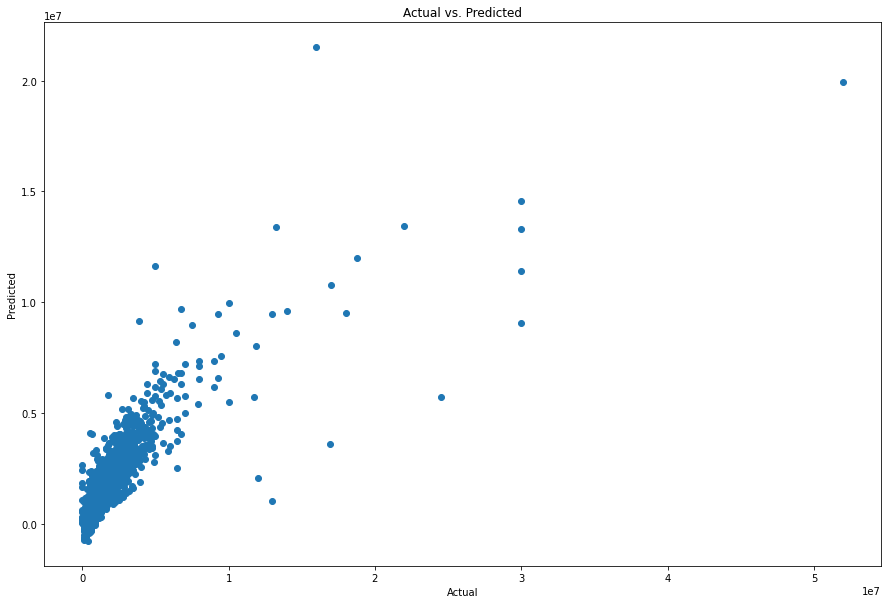

In [35]:
plt.figure(figsize=(15,10))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")


#m,b = np.polyfit(y_test, y_pred,1)
#plt.plot(y_test, m*y_test+b, color='red')

In [36]:
ridge_reg = Ridge(alpha=50, max_iter=200, tol=0.1)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=200, tol=0.1)

In [37]:
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test))

0.7123791075625219
0.6395944718862339


In [38]:
y_pred = ridge_reg.predict(X_test)
print(y_pred)

[2165837.94745104 1088478.35647815 1389305.01513732 ...  999673.29850665
 1070304.9961422  1249821.69549657]


Text(0.5, 1.0, 'Actual vs. Predicted')

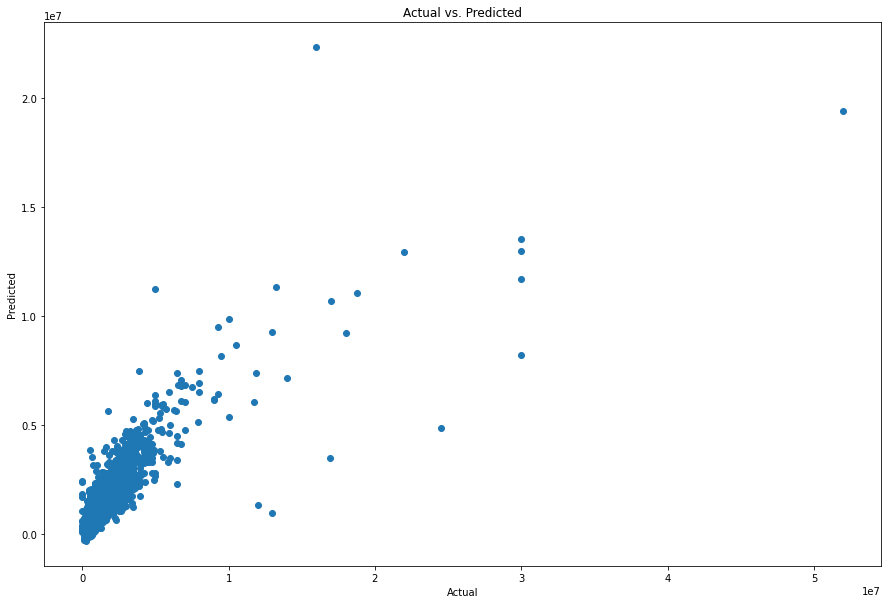

In [39]:
plt.figure(figsize=(15,10))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")


#m,b = np.polyfit(y_test, y_pred,1)
#plt.plot(y_test, m*y_test+b, color='red')

## Ridge and Lasso - An Extension

### Ridge

In [40]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [41]:
X = (X-X.min())/(X.max()-X.min()) #min-max scaling

In [42]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
     
np.shape(coefs)

(100, 406)

Text(0, 0.5, 'weights')

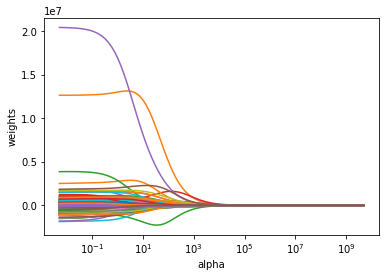

In [43]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [44]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Unnamed: 0                    -3.732713e+03
Total interior livable area    1.257954e+07
Bedrooms_Bathrooms            -1.572195e+06
School_Score                   7.589611e+05
Tax_value                      1.030176e+07
                                   ...     
City_Yolo                      5.259805e+04
City_Yorba Linda              -1.117073e+05
City_Yountville                6.968058e+05
City_Yuba City                -1.801169e+05
City_Zamora                   -1.076150e+05
Length: 406, dtype: float64
1069386675476.577


In [46]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Unnamed: 0                     4.911945e+04
Total interior livable area    1.250246e+07
Bedrooms_Bathrooms            -9.372665e+05
School_Score                   5.048724e+05
Tax_value                      1.915748e+07
                                   ...     
City_Yolo                      2.943943e+05
City_Yorba Linda              -3.799158e+05
City_Yountville                9.376058e+05
City_Yuba City                -4.162579e+04
City_Zamora                   -3.385827e+05
Length: 406, dtype: float64
1.6807224192186298e+38


In [47]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.4348745013088917

In [48]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

988337037705.3463

In [49]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Unnamed: 0                     2.506110e+04
Total interior livable area    1.282810e+07
Bedrooms_Bathrooms            -1.048501e+06
School_Score                   5.308454e+05
Tax_value                      1.865688e+07
                                   ...     
City_Yolo                      2.078970e+05
City_Yorba Linda              -3.112060e+05
City_Yountville                7.522446e+05
City_Yuba City                -1.245011e+05
City_Zamora                   -3.142680e+05
Length: 406, dtype: float64

### Lasso

Text(0, 0.5, 'weights')

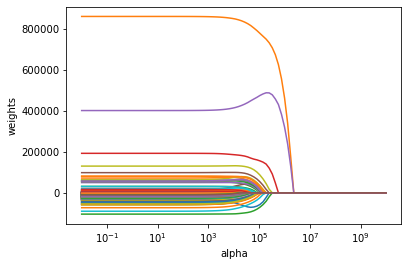

In [50]:
from sklearn.preprocessing import scale 

lasso = Lasso(max_iter = 100, tol=0.5)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [51]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

991792030893.1697

In [52]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Unnamed: 0                    -1.733229e+05
Total interior livable area    1.417074e+07
Bedrooms_Bathrooms            -1.411746e+06
School_Score                   8.518275e+05
Tax_value                      1.686221e+07
                                   ...     
City_Yolo                     -0.000000e+00
City_Yorba Linda              -0.000000e+00
City_Yountville                4.840259e+05
City_Yuba City                -2.744016e+05
City_Zamora                   -0.000000e+00
Length: 406, dtype: float64

### Citation for the above:^ http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

## (need to add some explanations)